In [1]:
!pip install git+https://github.com/paulgavrikov/visualkeras

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-ukwo4rky
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-ukwo4rky


In [2]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.models import load_model
from keras import backend as K
import PIL
import PIL
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
############################### CNN with trainable filters ###################################

In [4]:
img_width, img_height = 224, 224

#train_data_dir = r'C:\Users\ghgv\OneDrive\Documentos\Sistemas Inteligentes\jpeg\v_data\train'
#validation_data_dir = r'C:\Users\ghgv\OneDrive\Documentos\Sistemas Inteligentes\jpeg\v_data\test'
train_data_dir = r'/content/drive/MyDrive/v_data/train'
validation_data_dir = r'/content/drive/MyDrive/v_data/test'

nb_train_samples = 572
nb_validation_samples = 150
epochs = 23 #100
batch_size = 32

if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 



In [5]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape = input_shape)) 
#model.add(Conv2D(64, (11, 11), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3)) 
model.add(Activation('softmax')) 

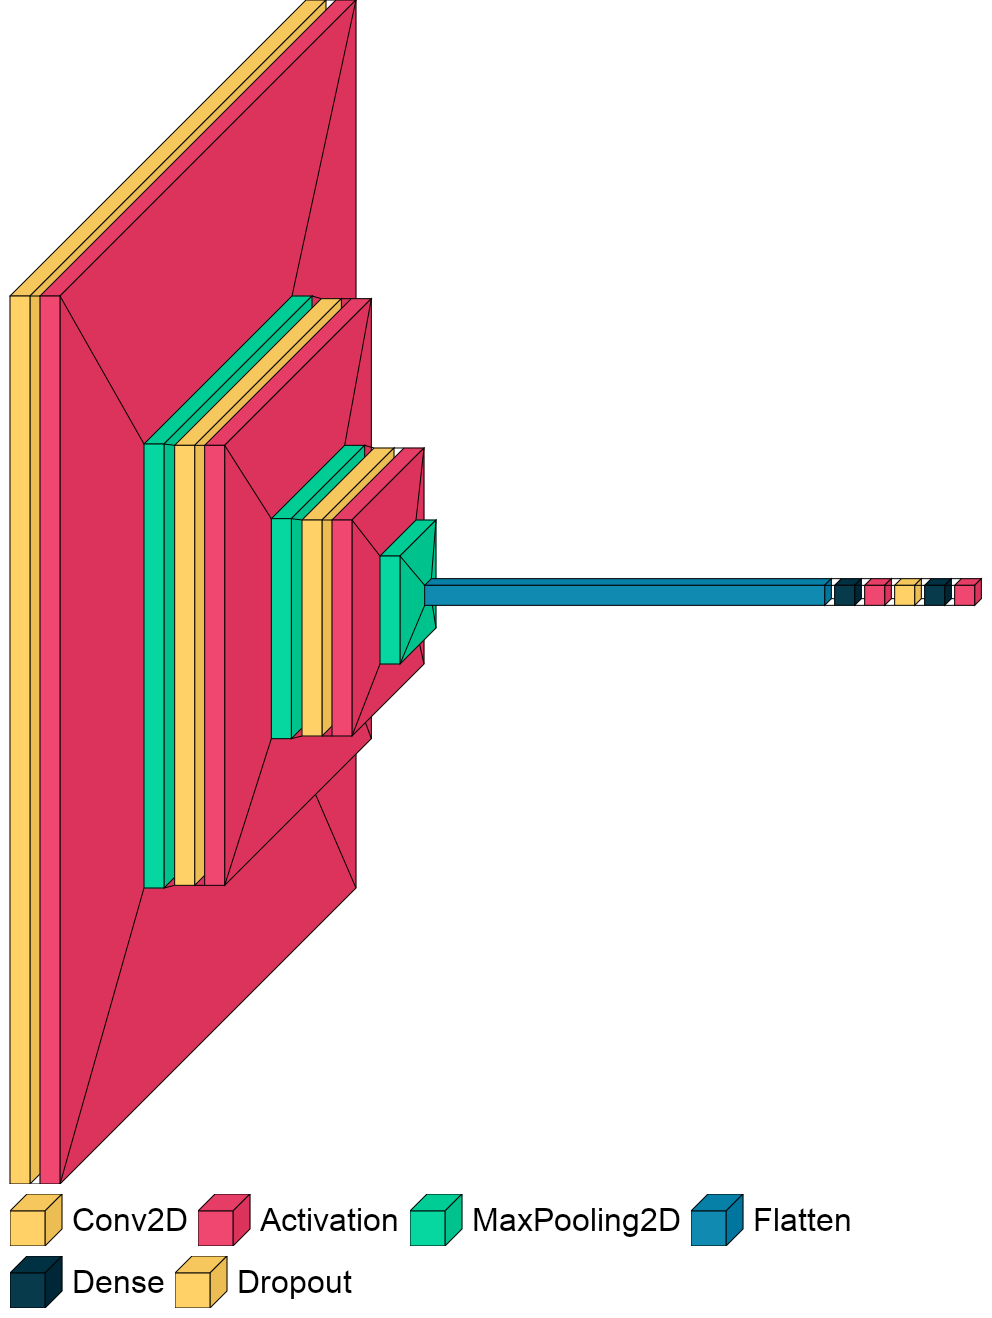

In [6]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model).show() # display using your system viewer
font = ImageFont.truetype("/content/drive/MyDrive/arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, to_file='/content/drive/MyDrive/output.png',legend=True, font=font)  # font is optional!

In [ ]:

#model.compile(loss ='binary_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 
model.compile(loss ='categorical_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 

train_datagen = ImageDataGenerator( rescale = 1. / 255,	shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True) 
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 
validation_generator = test_datagen.flow_from_directory( validation_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 
history=model.fit(train_generator,steps_per_epoch = nb_train_samples // batch_size, epochs = epochs, validation_data = validation_generator, validation_steps = nb_validation_samples // batch_size) 

json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)
# Guardar pesos en el disco
model.save_weights('model_saved.h5')



Found 572 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/23
 4/17 [======>.......................] - ETA: 33s - loss: 3.6648 - accuracy: 0.3952

In [ ]:
 plt.figure(1)  
   
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])  
 plt.title(' accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
 plt.subplot(212)  
 plt.plot(history.history['loss'])  
 plt.plot(history.history['val_loss'])  
 plt.title(' loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.show()

In [ ]:
#### From https://www.youtube.com/watch?v=ho6JXE3EbZ8 #####
print(model.summary())
layer=model.layers
filters,biases = model.layers[0].get_weights()
print(layer[1].name,filters.shape)

In [ ]:
fig1=plt.figure(figsize=(18,18))
columns = 8
rows = 8
n_filters = columns*rows
#for i in range(1,n_filters):
for i in range(1,32):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show

In [ ]:
model.summary()
model2 = Sequential()
for layer in model.layers[:-3]: # go through until last layer
    model2.add(layer)
model2.summary()


In [ ]:
model2.save('/content/drive/MyDrive/model2.h5') 

In [ ]:
from tensorflow import keras
model3 = tf.keras.models.load_model('/content/drive/MyDrive/model2.h5')
model3.summary()

In [ ]:
import visualkeras
from PIL import ImageFont
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Activation]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'gray'
color_map[MaxPooling2D]['fill'] = 'gray'
color_map[Dense]['fill'] = 'blue'
color_map[Flatten]['fill'] = 'gray'

visualkeras.layered_view(model3).show() # display using your system viewer
font = ImageFont.truetype("/content/drive/MyDrive/arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model3, to_file='/content/drive/MyDrive/output3.png',legend=True, font=font,color_map=color_map)  # font is optional!

In [ ]:
model3.build()

In [ ]:
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
ima=  tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/faces/bart/bart_color3.jpeg',target_size=(224, 224,3))
ima=  tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/plane2_half2.jpeg',target_size=(224, 224,3))
img = img_to_array(ima)
image = np.expand_dims(img, axis = 0)
plt.imshow(ima)
image.shape


In [ ]:
out = model3.predict(image)
#print(out[0,:,:,0])  #if 2D image
print(out/out.max(axis=1))  #if 1D image
out1=(out/out.max(axis=1))
print(255*out1)

In [ ]:
import numpy as np
from PIL import Image
shape = (8,8)
# Set transparency depending on x position
vector = np.matrix(255*out1)
# reform a numpy array of the original shape
arr2 = np.asarray(vector).reshape(shape)
print(arr2)
# make a PIL image
img2 = Image.fromarray(arr2)
plt.imshow(img2) # followed by 
plt.show()


In [ ]:
#np.save("/content/drive/MyDrive/faces/bart/bart_color3.npy", out1)
np.save("/content/drive/MyDrive/plane2_half2.npy", out1)
print(out1)

In [ ]:
layer=model3.layers
filters,biases = model.layers[0].get_weights()
print(layer[1].name,filters.shape)
fig1=plt.figure(figsize=(18,18))
columns = 8
rows = 8
n_filters = columns*rows
#for i in range(1,n_filters):
for i in range(1,32):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show

In [ ]:
################################### CNN with fixed Gabor Filters  ######################################

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from PIL import Image
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K
import PIL
import PIL
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import save


In [2]:
# Import python library for this notebook
import numpy as np # fundamental package for scientific computing
import matplotlib.pyplot as plt # package for plot function

# show figures inline
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    #plt.imshow(I, cmap=plt.gray(), **kwargs)
    plt.imshow(I,  **kwargs)

(101, 101)

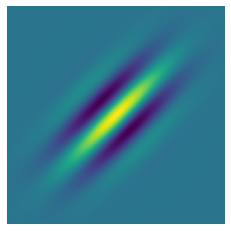

In [3]:
def genGabor(sz, omega, theta, func=np.cos, K=np.pi):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi * K**2) * np.exp(- omega**2 / (8*K**2) * ( 4 * x1**2 + y1**2))
#     myimshow(gauss)
    sinusoid = func(omega * x1) * np.exp(K**2 / 2)
#     myimshow(sinusoid)
    gabor = gauss * sinusoid
    return gabor
        
g = genGabor((100,100), 0.3, np.pi/4, func=np.cos) 
# change func to "cos", "sin" can generate sin gabor or cos gabor, here we pass a function name as a parameter
myimshow(g)
np.mean(g)
g.shape

In [4]:
theta = np.arange(0, np.pi, np.pi/8) # range of theta
omega = np.arange(0.1, 0.9, 0.1) # range of omega
print("Theta shape: %i " % theta.shape)
print("Omega shape: %i " % omega.shape)
params = [(t,o) for o in omega for t in theta]
sinFilterBank = []
cosFilterBank = []
gaborParams = []
for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'sz':(11, 11)}
    sinGabor = genGabor(func=np.sin, **gaborParam)
    cosGabor = genGabor(func=np.cos, **gaborParam)
    sinFilterBank.append(sinGabor)
    cosFilterBank.append(cosGabor)
    gaborParams.append(gaborParam)

Theta shape: 8 
Omega shape: 8 


64


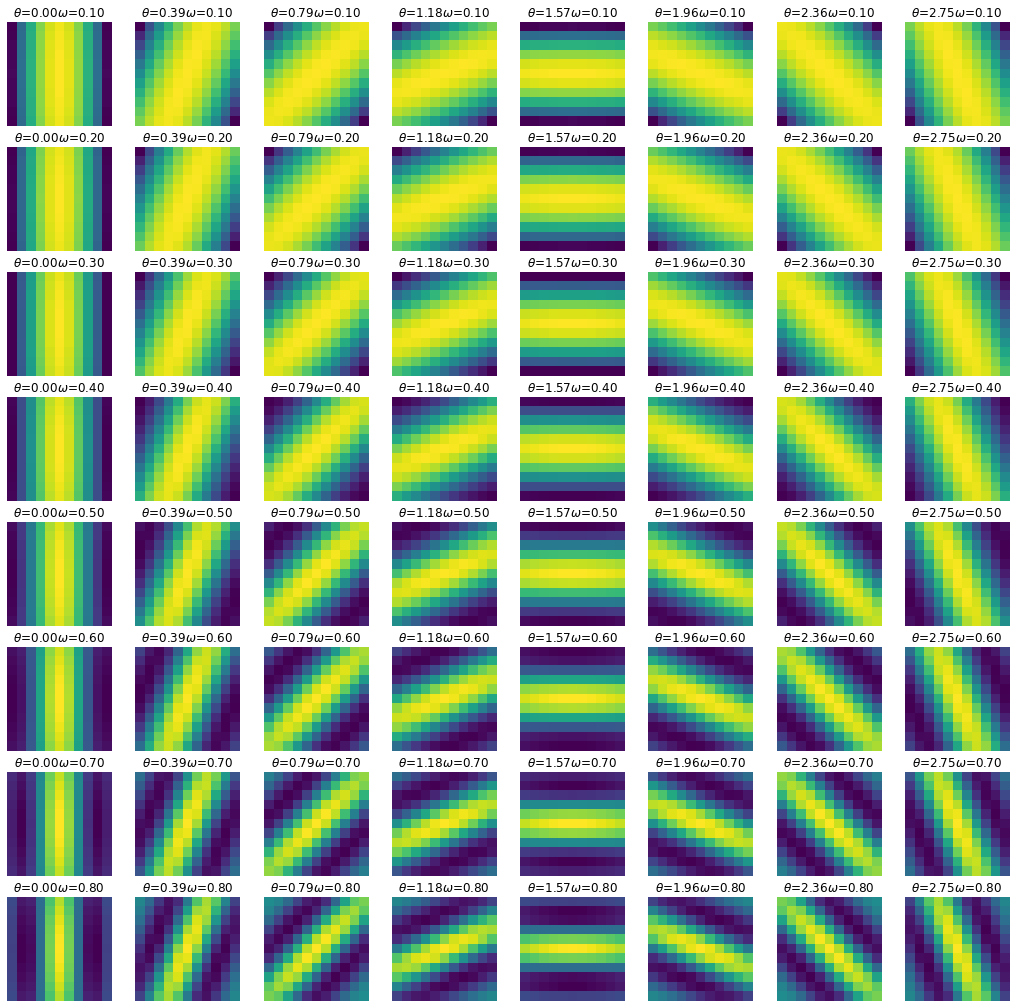

In [5]:
n = len(sinFilterBank)
plt.figure(figsize=(18,18)) #width,length
print(n)
for i in range(n):
    plt.subplot(8,8,i+1)
    plt.title(r'$\theta$={theta:.2f}$\omega$={omega:.2f}'.format(**gaborParams[i]))
    plt.axis('off'); 
    plt.imshow(cosFilterBank[i])

In [22]:
#Initialise to set kernel to required value
Num_kernels= len(sinFilterBank)
def kernel_init(shape,dtype=None):
    kernel = np.zeros(shape)
    #Create the Gabor filters tensor
    for i in range(Num_kernels):
        kernel[:,:,0,i] = np.array(sinFilterBank[i])
    return kernel

#Build Keras model
#Num_kernels
D2=0

In [7]:
#Test the layers without training.
D2=0
model = Sequential()
model.add(Conv2D(Num_kernels, [11,11], kernel_initializer=kernel_init,input_shape=(224,224,1), padding="same",activation='relu'))
model.add(MaxPooling2D((6,6), strides=(3, 3),padding='valid'))
#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
model.build()

In [10]:
#Load an image for test
ima = load_img('/content/drive/MyDrive/faces/bart/bart_color1.jpeg', target_size=(224, 224),color_mode="grayscale") #VGG user 224 as input
# convert the image to an array
ima = img_to_array(ima)
# expand dimensions to match the shape of model input
ima = np.expand_dims(ima, axis=0)

#ima = np.expand_dims(np.expand_dims(np.array(ima),2),0)
#ima.shape
#plt.imshow(ima)

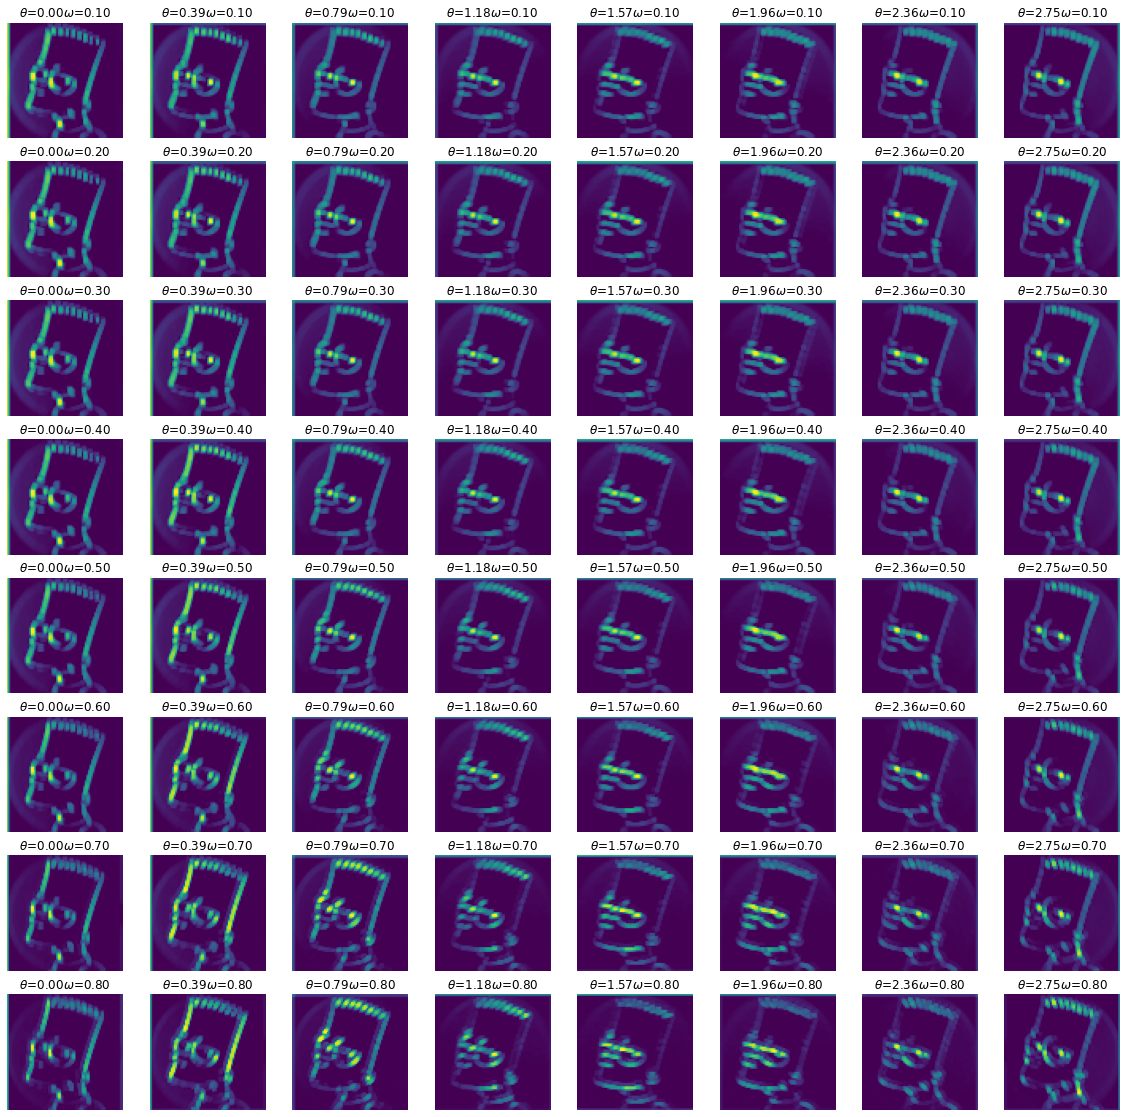

In [11]:
# To apply existing filter, we use predict with no training
out = model.predict(ima)
#rint(out[0,:,:,0])  #if 2D image
#print(out[0,0])  #if 1D image
#rint(out)
#np.savetxt('test.csv',out, delimiter=',')


if(D2==0):
    n = Num_kernels
    plt.figure(figsize=(20,20)) #width,length
    for i in range(n):
        plt.subplot(8,8,i+1)
        plt.title(r'$\theta$={theta:.2f}$\omega$={omega:.2f}'.format(**gaborParams[i]))
        plt.axis('off')
        image2 = np.array(out[0,:,:,i])
        #mage2 = np.array(out[0,i])
        plt.imshow(image2)

In [12]:
img_width, img_height = 224, 224

#train_data_dir = r'C:\Users\ghgv\OneDrive\Documentos\Sistemas Inteligentes\jpeg\v_data\train'
#validation_data_dir = r'C:\Users\ghgv\OneDrive\Documentos\Sistemas Inteligentes\jpeg\v_data\test'
train_data_dir = r'/content/drive/MyDrive/v_data/train'
validation_data_dir = r'/content/drive/MyDrive/v_data/test'

nb_train_samples = 572
nb_validation_samples = 150
epochs = 100
batch_size = 32

if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3)

In [13]:
model = Sequential() 
model.add(Conv2D(Num_kernels, [11,11], kernel_initializer=kernel_init,input_shape=input_shape, activation='relu',trainable=False))
model.add(MaxPooling2D((6,6), strides=(3, 3),padding='valid'))

#model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
#model.add(Activation('relu')) 
#model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3)) 
model.add(Activation('softmax')) 

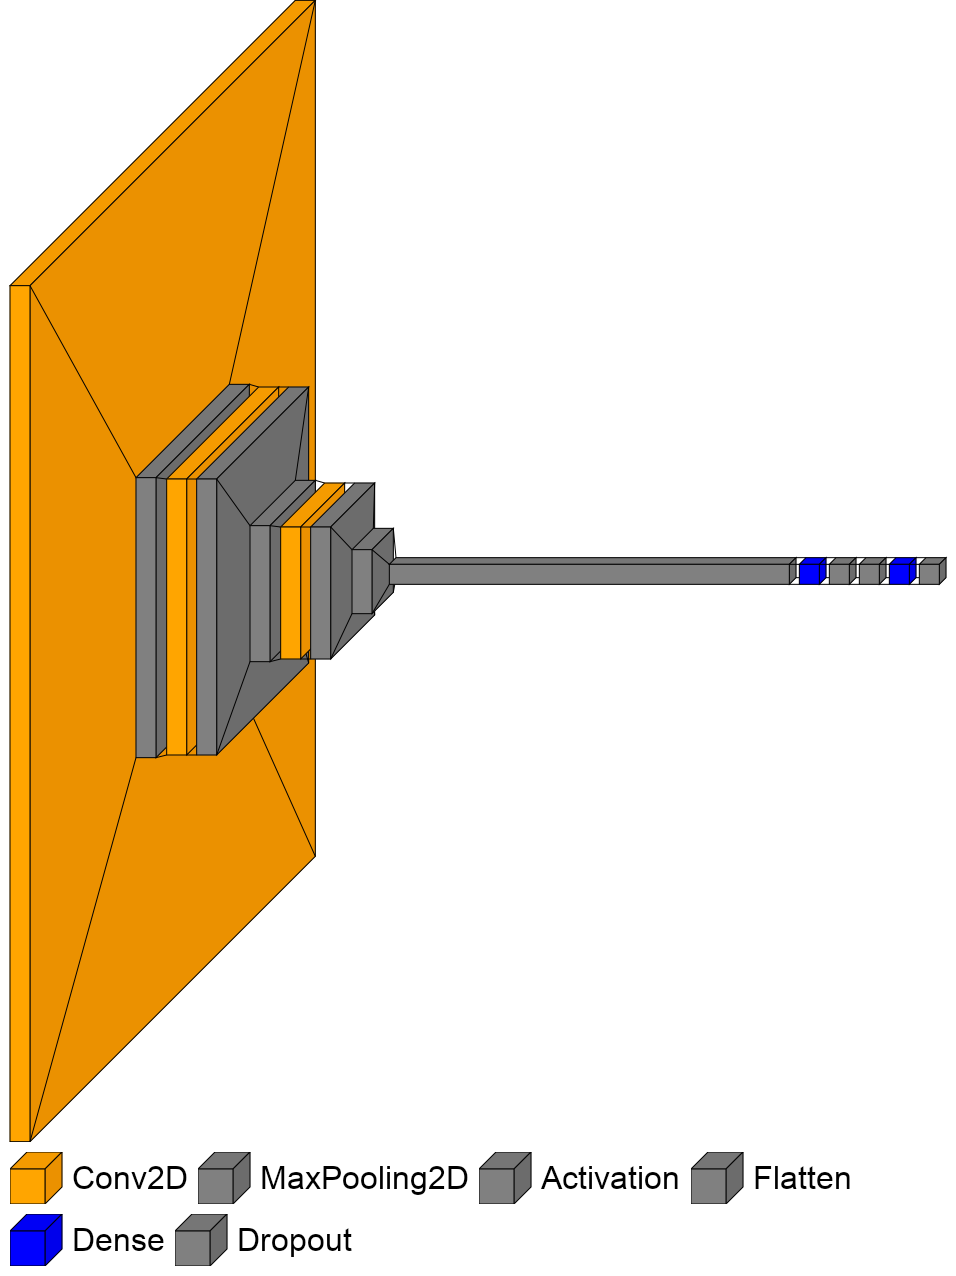

In [14]:
import visualkeras
from PIL import ImageFont
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Activation]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'gray'
color_map[MaxPooling2D]['fill'] = 'gray'
color_map[Dense]['fill'] = 'blue'
color_map[Flatten]['fill'] = 'gray'

visualkeras.layered_view(model).show() # display using your system viewer
font = ImageFont.truetype("/content/drive/MyDrive/arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, to_file='/content/drive/MyDrive/output.png',legend=True, font=font,color_map=color_map)  # font is optional!

In [15]:
#model.compile(loss ='binary_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 
model.compile(loss ='categorical_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 

train_datagen = ImageDataGenerator( rescale = 1. / 255,	shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True) 
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 
validation_generator = test_datagen.flow_from_directory( validation_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 
history=model.fit(train_generator,steps_per_epoch = nb_train_samples // batch_size, epochs = epochs, validation_data = validation_generator, validation_steps = nb_validation_samples // batch_size) 

json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)
# Guardar pesos en el disco
model.save_weights('model_saved_gabor.h5')

Found 572 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/100
17/17 [==============================] - 49s 3s/step - loss: 2.7094 - accuracy: 0.4019 - val_loss: 1.1016 - val_accuracy: 0.3047
Epoch 2/100
17/17 [==============================] - 7s 421ms/step - loss: 1.0516 - accuracy: 0.4259 - val_loss: 1.0699 - val_accuracy: 0.3984
Epoch 3/100
17/17 [==============================] - 7s 423ms/step - loss: 1.0354 - accuracy: 0.4519 - val_loss: 1.0445 - val_accuracy: 0.3516
Epoch 4/100
17/17 [==============================] - 7s 418ms/step - loss: 0.9711 - accuracy: 0.5093 - val_loss: 1.0319 - val_accuracy: 0.4219
Epoch 5/100
17/17 [==============================] - 7s 418ms/step - loss: 0.9330 - accuracy: 0.5407 - val_loss: 1.0061 - val_accuracy: 0.5469
Epoch 6/100
17/17 [==============================] - 7s 419ms/step - loss: 0.9480 - accuracy: 0.5741 - val_loss: 1.0055 - val_accuracy: 0.5547
Epoch 7/100
17/17 [==============================] - 8s 448ms/

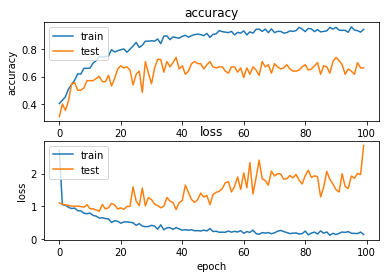

In [16]:
 plt.figure(1)  
   
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])  
 plt.title('accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
 plt.subplot(212)  
 plt.plot(history.history['loss'])  
 plt.plot(history.history['val_loss'])  
 plt.title('loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.show()

In [17]:
#################### Check the filters are preserved
#### From https://www.youtube.com/watch?v=ho6JXE3EbZ8 #####
print(model.summary())
layer=model.layers
filters,biases = model.layers[0].get_weights()
print(layer[1].name,filters.shape)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 214, 214, 64)      23296     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 69, 69, 32)        8224      
                                                                 
 activation (Activation)     (None, 69, 69, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)       

<function matplotlib.pyplot.show>

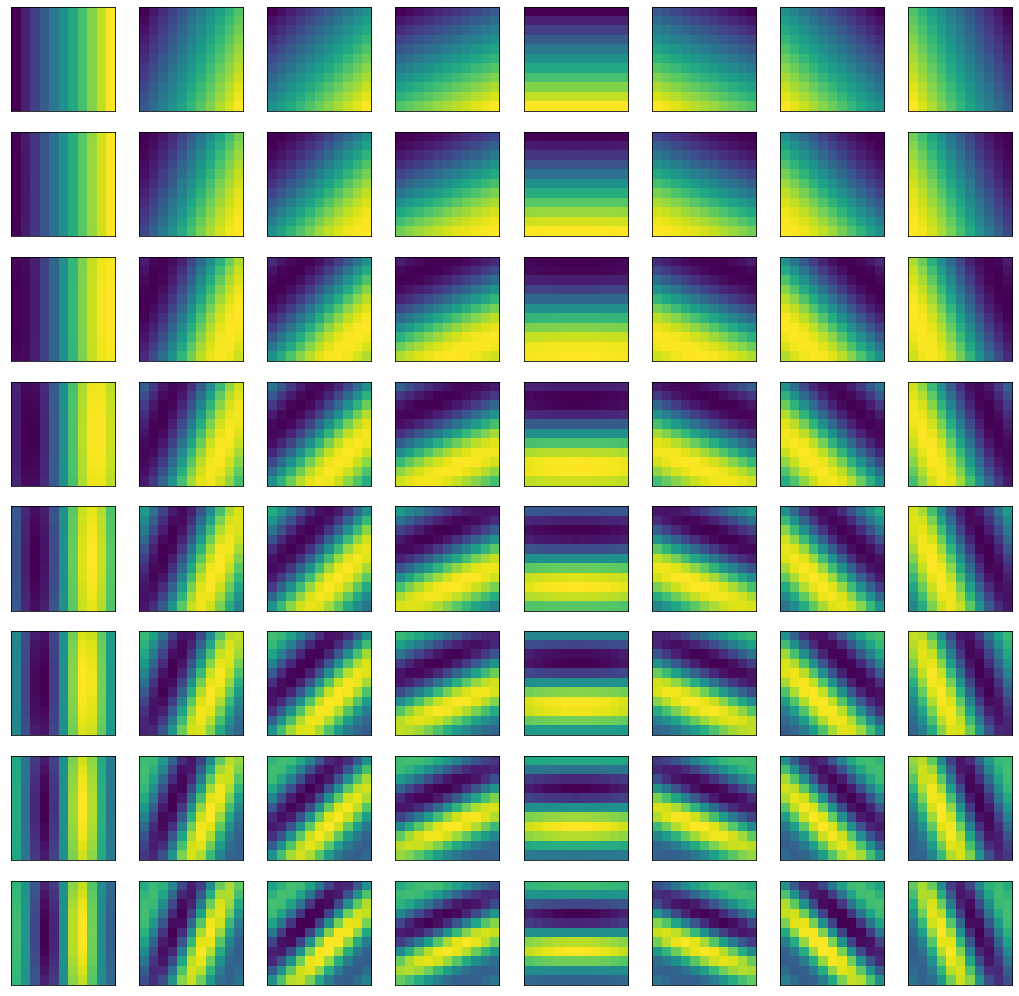

In [18]:

fig1=plt.figure(figsize=(18,18))
columns = 8
rows = 8
n_filters = columns*rows
for i in range(1,n_filters+1):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show



In [19]:
model.summary()
model2_gabor = Sequential()
for layer in model.layers[:-3]: # go through until last layer
    model2_gabor.add(layer)
model2_gabor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 214, 214, 64)      23296     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 69, 69, 32)        8224      
                                                                 
 activation (Activation)     (None, 69, 69, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)       

In [20]:
model2_gabor.save('/content/drive/MyDrive/model2_gabor.h5') 

In [23]:
from tensorflow import keras
model3_gabor = tf.keras.models.load_model('/content/drive/MyDrive/model2_gabor.h5',custom_objects={"kernel_init": kernel_init })
model3_gabor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 214, 214, 64)      23296     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 69, 69, 32)        8224      
                                                                 
 activation (Activation)     (None, 69, 69, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)       

(1, 224, 224, 3)

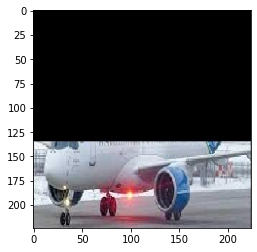

In [75]:
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
#ima=  tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/faces/bart/bart_color3.jpeg',target_size=(224, 224,3))
ima=  tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/plane2_half2.jpeg',target_size=(224, 224,3))
img = img_to_array(ima)
image = np.expand_dims(img, axis = 0)
plt.imshow(ima)
image.shape

In [76]:
out = model3_gabor.predict(image)
#print(out[0,:,:,0])  #if 2D image
print(out/out.max(axis=1))  #if 1D image
out1=(out/out.max(axis=1))
print(255*out1)

[[0.934478   0.5764166  0.00947955 0.         0.         0.993642
  0.         0.54309636 0.         0.         0.         0.
  0.         0.13118076 0.         0.         0.35210297 0.5161078
  0.         0.         0.         0.         0.4258115  0.
  0.89186585 0.72224385 0.         0.87978375 0.5930075  0.9632482
  0.         0.         0.         0.20599146 0.16980365 0.
  0.7003326  0.24924454 0.         0.         1.         0.3019846
  0.         0.         0.26342547 0.8396752  0.5484151  0.
  0.         0.         0.         0.00427947 0.         0.
  0.         0.         0.         0.7451211  0.         0.
  0.2720684  0.         0.         0.39826798]]
[[238.29189   146.98624     2.4172854   0.          0.        253.37871
    0.        138.48958     0.          0.          0.          0.
    0.         33.451096    0.          0.         89.786255  131.60748
    0.          0.          0.          0.        108.58193     0.
  227.4258    184.17218     0.        224.34485

[[238.29189   146.98624     2.4172854   0.          0.        253.37871
    0.        138.48958  ]
 [  0.          0.          0.          0.          0.         33.451096
    0.          0.       ]
 [ 89.786255  131.60748     0.          0.          0.          0.
  108.58193     0.       ]
 [227.4258    184.17218     0.        224.34485   151.21692   245.6283
    0.          0.       ]
 [  0.         52.527824   43.29993     0.        178.58481    63.557358
    0.          0.       ]
 [255.         77.00607     0.          0.         67.17349   214.11717
  139.84586     0.       ]
 [  0.          0.          0.          1.0912644   0.          0.
    0.          0.       ]
 [  0.        190.00589     0.          0.         69.37744     0.
    0.        101.558334 ]]


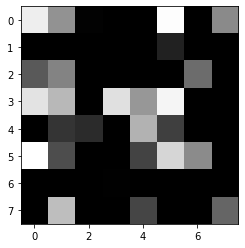

In [77]:
import numpy as np
from PIL import Image
shape = (8,8)
# Set transparency depending on x position
vector = np.matrix(255*out1)
# reform a numpy array of the original shape
arr2 = np.asarray(vector).reshape(shape)
print(arr2)
# make a PIL image
img2 = Image.fromarray(arr2)
plt.imshow(img2) # followed by 
plt.show()


In [78]:
#np.save("/content/drive/MyDrive/faces/bart/bart_color3_gabor.npy", out1)
np.save("/content/drive/MyDrive/plane2_half2_gabor.npy", out1)
print(out1)

[[0.934478   0.5764166  0.00947955 0.         0.         0.993642
  0.         0.54309636 0.         0.         0.         0.
  0.         0.13118076 0.         0.         0.35210297 0.5161078
  0.         0.         0.         0.         0.4258115  0.
  0.89186585 0.72224385 0.         0.87978375 0.5930075  0.9632482
  0.         0.         0.         0.20599146 0.16980365 0.
  0.7003326  0.24924454 0.         0.         1.         0.3019846
  0.         0.         0.26342547 0.8396752  0.5484151  0.
  0.         0.         0.         0.00427947 0.         0.
  0.         0.         0.         0.7451211  0.         0.
  0.2720684  0.         0.         0.39826798]]
